# Installation of Libraries

In [71]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.0 MB)


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from pandas_profiling import ProfileReport
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Dataset

In [55]:
from google.colab import files
uploaded = files.upload()

Saving roo_data.csv to roo_data (3).csv


DATASET


In [56]:
import io
data = pd.read_csv(io.BytesIO(uploaded['roo_data.csv']))
data

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,...,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,...,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,...,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,...,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


# Preprocessing

RECLASSIFICATION OF VARIABLES

In [57]:
data.loc[data['Suggested Job Role'] =='Data Architect','Suggested Job Role' ] = 'Architect'
data.loc[data['Suggested Job Role'] =='Solutions Architect','Suggested Job Role' ] = 'Architect'

data.loc[data['Suggested Job Role'] =='Technical Services/Help Desk/Tech Support','Suggested Job Role' ] = 'Support'
data.loc[data['Suggested Job Role'] =='Technical Support','Suggested Job Role' ] = 'Support'

data.loc[data['Suggested Job Role'] =='Database Manager','Suggested Job Role' ] = 'Manager'
data.loc[data['Suggested Job Role'] =='Information Technology Manager','Suggested Job Role' ] = 'Manager'
data.loc[data['Suggested Job Role'] =='Project Manager','Suggested Job Role' ] = 'Manager'

data.loc[data['Suggested Job Role'] == 'Network Security Administrator','Suggested Job Role'] = 'Admin'
data.loc[data['Suggested Job Role'] == 'Portal Administrator','Suggested Job Role'] = 'Admin'
data.loc[data['Suggested Job Role'] == 'Database Administrator','Suggested Job Role'] = 'Admin'
data.loc[data['Suggested Job Role'] == 'Systems Security Administrator','Suggested Job Role'] = 'Admin'

data.loc[data['Suggested Job Role'] =='UX Designer','Suggested Job Role' ] = 'Associate'
data.loc[data['Suggested Job Role'] =='Software Quality Assurance (QA) / Testing','Suggested Job Role' ] = 'Associate'
data.loc[data['Suggested Job Role'] =='Quality Assurance Associate','Suggested Job Role' ] = 'Associate'
data.loc[data['Suggested Job Role'] =='Information Technology Auditor','Suggested Job Role' ] = 'Associate'

data.loc[data['Suggested Job Role'] =='Network Engineer','Suggested Job Role' ] = 'Engineer'
data.loc[data['Suggested Job Role'] =='Network Security Engineer','Suggested Job Role' ] = 'Engineer'
data.loc[data['Suggested Job Role'] =='Software Engineer','Suggested Job Role' ] = 'Engineer'
data.loc[data['Suggested Job Role'] =='Software Systems Engineer','Suggested Job Role' ] = 'Engineer'
data.loc[data['Suggested Job Role'] =='Technical Engineer','Suggested Job Role' ] = 'Engineer'

data.loc[data['Suggested Job Role'] =='Applications Developer','Suggested Job Role' ] = 'Developer'
data.loc[data['Suggested Job Role'] =='CRM Technical Developer','Suggested Job Role' ] = 'Developer'
data.loc[data['Suggested Job Role'] =='Database Developer','Suggested Job Role' ] = 'Developer'
data.loc[data['Suggested Job Role'] =='Mobile Applications Developer','Suggested Job Role' ] = 'Developer'
data.loc[data['Suggested Job Role'] =='Software Developer','Suggested Job Role' ] = 'Developer'
data.loc[data['Suggested Job Role'] =='Web Developer','Suggested Job Role' ] = 'Developer'

data.loc[data['Suggested Job Role'] =='Business Intelligence Analyst','Suggested Job Role' ] = 'Analyst'
data.loc[data['Suggested Job Role'] =='Business Systems Analyst','Suggested Job Role' ] = 'Analyst'
data.loc[data['Suggested Job Role'] =='CRM Business Analyst','Suggested Job Role' ] = 'Analyst'
data.loc[data['Suggested Job Role'] =='Information Security Analyst','Suggested Job Role' ] = 'Analyst'
data.loc[data['Suggested Job Role'] =='Programmer Analyst','Suggested Job Role' ] = 'Analyst'
data.loc[data['Suggested Job Role'] =='Systems Analyst','Suggested Job Role' ] = 'Analyst'
data.loc[data['Suggested Job Role'] =='E-Commerce Analyst','Suggested Job Role' ] = 'Analyst'
data

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Admin
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Admin
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Admin
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,...,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Engineer
19996,80,69,83,87,82,66,66,92,67,7,...,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,Analyst
19997,83,70,80,87,64,85,69,94,88,7,...,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Analyst
19998,68,87,91,88,66,74,61,87,61,5,...,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Associate


LABEL ENCODING

In [58]:
label_encoder = preprocessing.LabelEncoder()

In [59]:
data['can work long time before system?']= label_encoder.fit_transform(data['can work long time before system?'])
data['self-learning capability?']= label_encoder.fit_transform(data['self-learning capability?'])
data['Extra-courses did']= label_encoder.fit_transform(data['Extra-courses did'])
data['certifications']= label_encoder.fit_transform(data['certifications'])
data['workshops']= label_encoder.fit_transform(data['workshops'])
data['talenttests taken?']= label_encoder.fit_transform(data['talenttests taken?'])
data['olympiads']= label_encoder.fit_transform(data['olympiads'])
data['reading and writing skills']= label_encoder.fit_transform(data['reading and writing skills'])
data['memory capability score']= label_encoder.fit_transform(data['memory capability score'])
data['Interested subjects']= label_encoder.fit_transform(data['Interested subjects'])
data['interested career area ']= label_encoder.fit_transform(data['interested career area '])
data['Job/Higher Studies?']= label_encoder.fit_transform(data['Job/Higher Studies?'])
data['Type of company want to settle in?']= label_encoder.fit_transform(data['Type of company want to settle in?'])
data['Taken inputs from seniors or elders']= label_encoder.fit_transform(data['Taken inputs from seniors or elders'])
data['interested in games']= label_encoder.fit_transform(data['interested in games'])
data['Interested Type of Books']= label_encoder.fit_transform(data['Interested Type of Books'])
data['Salary Range Expected']= label_encoder.fit_transform(data['Salary Range Expected'])
data['In a Realtionship?']= label_encoder.fit_transform(data['In a Realtionship?'])
data['Gentle or Tuff behaviour?']= label_encoder.fit_transform(data['Gentle or Tuff behaviour?'])
data['Management or Technical']= label_encoder.fit_transform(data['Management or Technical'])
data['Salary/work']= label_encoder.fit_transform(data['Salary/work'])
data['hard/smart worker']= label_encoder.fit_transform(data['hard/smart worker'])
data['worked in teams ever?']= label_encoder.fit_transform(data['worked in teams ever?'])
data['Introvert']= label_encoder.fit_transform(data['Introvert'])
data['Suggested Job Role']= label_encoder.fit_transform(data['Suggested Job Role'])
data

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,21,1,0,1,0,0,0,1,0,5
1,78,62,73,60,71,70,73,84,91,12,...,5,1,1,0,1,0,0,0,1,0
2,71,86,91,87,61,81,72,72,94,11,...,29,0,0,1,0,1,0,0,1,0
3,76,87,60,84,89,73,62,88,69,7,...,23,0,1,0,0,1,1,1,1,0
4,92,62,90,67,71,89,73,71,73,4,...,7,1,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,...,17,0,1,1,0,0,1,1,0,6
19996,80,69,83,87,82,66,66,92,67,7,...,7,1,0,1,0,0,0,0,1,1
19997,83,70,80,87,64,85,69,94,88,7,...,10,0,1,0,1,1,0,0,1,1
19998,68,87,91,88,66,74,61,87,61,5,...,29,0,0,0,0,1,1,1,0,3


EDA REPORT 

In [52]:
#profile = ProfileReport(data, title="EDA Report")
#profile.to_notebook_iframe()

In [60]:
X= data.drop(columns='Suggested Job Role')
Y= data['Suggested Job Role']

# ARTIFICIAL NEURAL NETWORK (MLP CLASSIFIER) 
# (Parameter: activation = tanh, solver = sgd)

In [ ]:
split_ratio=[0.4,0.3,0.2,0.1]
hidden_layer_sizes=[(128,252,252,128),(118,246,246,118),(148,266,266,148),(108,222,222,108)]
# Hidden Layer 1 (128,252,252,128) = 10
# Hidden Layer 2 (118,246,246,118) = 20
# Hidden Layer 3 (148,266,266,148) = 30
# Hidden Layer 4 (108,222,222,108) = 40
Layer_Range=[10,20,30,40]
accuracy=[]
precision=[]
recall=[]
F1=[]

for i in range(0,4):
  X_train, X_test,Y_train,Y_test= train_test_split( X, Y, test_size=split_ratio[i], random_state=2)
  sc_X = StandardScaler()
  X_trainscaled=sc_X.fit_transform(X_train)
  X_testscaled=sc_X.transform(X_test)

  gd = MLPClassifier(activation='tanh', solver = 'sgd',early_stopping = True, hidden_layer_sizes=hidden_layer_sizes[i], verbose = 1, max_iter = 200).fit(X_trainscaled, Y_train)
  Y_pred=gd.predict(X_testscaled) 
  print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)*100,"%")
  accuracy.append(metrics.accuracy_score(Y_test, Y_pred)*100)

  print ("Precision: ",precision_score(Y_test, Y_pred, average='macro')*100,"%")
  precision.append(precision_score(Y_test, Y_pred, average='macro')*100)

  print ("F1: ",f1_score(Y_test, Y_pred, average='macro')*100,"%")
  F1.append(f1_score(Y_test, Y_pred, average='macro')*100)

  print ("Recall: ",recall_score(Y_test, Y_pred, average=None)*100,"%")
  recall.append(recall_score(Y_test, Y_pred, average=None)*100)



Iteration 1, loss = 2.21853893
Validation score: 0.160000
Iteration 2, loss = 2.12380934
Validation score: 0.175000
Iteration 3, loss = 2.09460880
Validation score: 0.190000
Iteration 4, loss = 2.08220802
Validation score: 0.187500
Iteration 5, loss = 2.07564529
Validation score: 0.190000
Iteration 6, loss = 2.07118654
Validation score: 0.190833
Iteration 7, loss = 2.06818526
Validation score: 0.190000
Iteration 8, loss = 2.06584920
Validation score: 0.185000
Iteration 9, loss = 2.06406112
Validation score: 0.187500
Iteration 10, loss = 2.06260679
Validation score: 0.190833
Iteration 11, loss = 2.06138386
Validation score: 0.187500
Iteration 12, loss = 2.06038778
Validation score: 0.187500
Iteration 13, loss = 2.05955782
Validation score: 0.182500
Iteration 14, loss = 2.05840301
Validation score: 0.184167
Iteration 15, loss = 2.05760228
Validation score: 0.184167
Iteration 16, loss = 2.05693396
Validation score: 0.186667
Iteration 17, loss = 2.05623348
Validation score: 0.180000
Valida

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 1, loss = 2.20405391
Validation score: 0.172857
Iteration 2, loss = 2.11431320
Validation score: 0.177857
Iteration 3, loss = 2.09011104
Validation score: 0.183571
Iteration 4, loss = 2.08053422
Validation score: 0.183571
Iteration 5, loss = 2.07526211
Validation score: 0.182143
Iteration 6, loss = 2.07200476
Validation score: 0.177143
Iteration 7, loss = 2.06967245
Validation score: 0.179286
Iteration 8, loss = 2.06763423
Validation score: 0.178571
Iteration 9, loss = 2.06616818
Validation score: 0.176429
Iteration 10, loss = 2.06479681
Validation score: 0.178571
Iteration 11, loss = 2.06377104
Validation score: 0.176429
Iteration 12, loss = 2.06267860
Validation score: 0.175000
Iteration 13, loss = 2.06186065
Validation score: 0.172857
Iteration 14, loss = 2.06116838
Validation score: 0.171429
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 18.05 %
Precision:  9.41830542085354 %
F1:  8.183416499788688 %
Recall:  [11.332

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 1, loss = 2.21781554
Validation score: 0.156875
Iteration 2, loss = 2.10839374
Validation score: 0.182500
Iteration 3, loss = 2.08564875
Validation score: 0.177500
Iteration 4, loss = 2.07732077
Validation score: 0.181250
Iteration 5, loss = 2.07302061
Validation score: 0.183750
Iteration 6, loss = 2.07018535
Validation score: 0.190000
Iteration 7, loss = 2.06806411
Validation score: 0.186250
Iteration 8, loss = 2.06666584
Validation score: 0.186250
Iteration 9, loss = 2.06533794
Validation score: 0.190625
Iteration 10, loss = 2.06434161
Validation score: 0.188750
Iteration 11, loss = 2.06327478
Validation score: 0.188750
Iteration 12, loss = 2.06238595
Validation score: 0.190625
Iteration 13, loss = 2.06177795
Validation score: 0.190625
Iteration 14, loss = 2.06097617
Validation score: 0.188750
Iteration 15, loss = 2.06032614
Validation score: 0.192500
Iteration 16, loss = 2.05959593
Validation score: 0.193750
Iteration 17, loss = 2.05896359
Validation score: 0.196875
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 1, loss = 2.20037368
Validation score: 0.170556
Iteration 2, loss = 2.11022529
Validation score: 0.184444
Iteration 3, loss = 2.08867293
Validation score: 0.191111
Iteration 4, loss = 2.07947948
Validation score: 0.188333
Iteration 5, loss = 2.07449126
Validation score: 0.188333
Iteration 6, loss = 2.07135445
Validation score: 0.187222
Iteration 7, loss = 2.06911559
Validation score: 0.183889
Iteration 8, loss = 2.06742398
Validation score: 0.186667
Iteration 9, loss = 2.06612508
Validation score: 0.183333
Iteration 10, loss = 2.06508512
Validation score: 0.183333
Iteration 11, loss = 2.06409346
Validation score: 0.184444
Iteration 12, loss = 2.06324714
Validation score: 0.186111
Iteration 13, loss = 2.06239365
Validation score: 0.185000
Iteration 14, loss = 2.06181465
Validation score: 0.183889
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 16.950000000000003 %
Precision:  8.68290628654656 %
F1:  7.30787873293883 %
Reca

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy


Accuracy: [17.925, 18.05, 17.575, 16.950000000000003] %



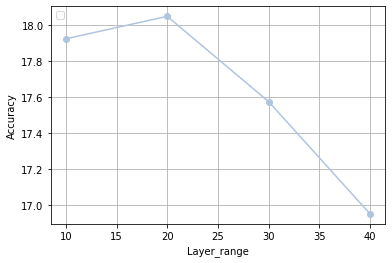

In [ ]:
fig, ax = plt.subplots()
ax.plot(Layer_Range, accuracy, **{'color': 'lightsteelblue', 'marker': 'o'})
plt.legend(loc = "upper left")
plt.xlabel('Layer_range')
plt.ylabel('Accuracy')
print()
print("Accuracy:", accuracy,"%")
print()
plt.grid()
plt.show()


Precision


Precision: [9.07490421430803, 9.41830542085354, 7.352899565100829, 8.68290628654656] %



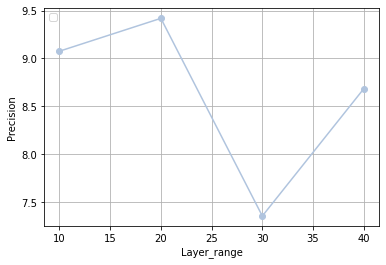

In [ ]:
fig, ax = plt.subplots()
ax.plot(Layer_Range, precision, **{'color': 'lightsteelblue', 'marker': 'o'})
plt.legend(loc = "upper left")
plt.xlabel('Layer_range')
plt.ylabel('Precision')
print()
print("Precision:", precision,"%")
print()
plt.grid()
plt.show()

F1


F1: [7.345482843571011, 8.183416499788688, 6.2310167149219335, 7.30787873293883] %



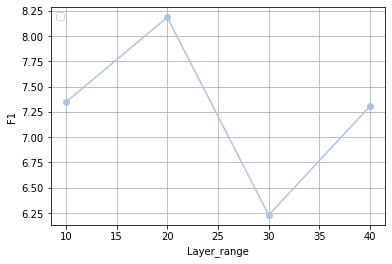

In [ ]:
fig, ax = plt.subplots()
ax.plot(Layer_Range, F1, **{'color': 'lightsteelblue', 'marker': 'o'})
plt.legend(loc = "upper left")
plt.xlabel('Layer_range')
plt.ylabel('F1')
print()
print("F1:", F1,"%")
print()
plt.grid()
plt.show()

Recall


Recall: [array([ 7.91628753, 67.64514025,  0.        ,  0.53648069,  0.        ,
       17.16363636,  5.67901235,  0.        ,  0.        ]), array([11.33250311, 61.17342537,  0.        ,  1.30624093,  0.        ,
       18.28571429,  8.87445887,  0.        ,  0.        ]), array([ 3.82513661, 73.3512786 ,  0.        ,  0.        ,  0.        ,
       17.22689076,  2.28013029,  0.        ,  0.        ]), array([ 4.59770115, 59.47368421,  0.        ,  0.93023256,  0.        ,
       19.88472622,  9.55414013,  0.        ,  0.        ])] %



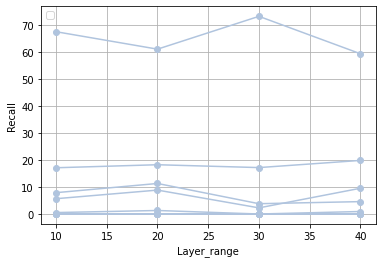

In [ ]:
fig, ax = plt.subplots()
ax.plot(Layer_Range, recall, **{'color': 'lightsteelblue', 'marker': 'o'})
plt.legend(loc = "upper left")
plt.xlabel('Layer_range')
plt.ylabel('Recall')
print()
print("Recall:", recall,"%")
print()
plt.grid()
plt.show()

# ARTIFICIAL NEURAL NETWORK (MLP CLASSIFIER) 
# (Parameter: activation = relu, solver = adam)

Iteration 1, loss = 2.08882406
Validation score: 0.170000
Iteration 2, loss = 2.05887226
Validation score: 0.150000
Iteration 3, loss = 2.03645567
Validation score: 0.181667
Iteration 4, loss = 2.00336434
Validation score: 0.171667
Iteration 5, loss = 1.94739171
Validation score: 0.168333
Iteration 6, loss = 1.87619007
Validation score: 0.156667
Iteration 7, loss = 1.77942485
Validation score: 0.152500
Iteration 8, loss = 1.66753626
Validation score: 0.155833
Iteration 9, loss = 1.53876966
Validation score: 0.143333
Iteration 10, loss = 1.39875387
Validation score: 0.135833
Iteration 11, loss = 1.23398648
Validation score: 0.132500
Iteration 12, loss = 1.09055402
Validation score: 0.135000
Iteration 13, loss = 0.94843992
Validation score: 0.130000
Iteration 14, loss = 0.81079776
Validation score: 0.133333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 18.387500000000003 %
Precision:  7.745690167941503 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1:  6.469076662918194 %
Recall:  [ 3.91264786 66.47097195  0.          0.          0.         29.38181818
  0.41152263  0.          0.        ] %
Iteration 1, loss = 2.09025770
Validation score: 0.182857
Iteration 2, loss = 2.06439064
Validation score: 0.184286
Iteration 3, loss = 2.04541738
Validation score: 0.182143
Iteration 4, loss = 2.01837467
Validation score: 0.185000
Iteration 5, loss = 1.98160288
Validation score: 0.172143
Iteration 6, loss = 1.92147640
Validation score: 0.172857
Iteration 7, loss = 1.84606867
Validation score: 0.172857
Iteration 8, loss = 1.75214451
Validation score: 0.162143
Iteration 9, loss = 1.65498987
Validation score: 0.147143
Iteration 10, loss = 1.51678564
Validation score: 0.140714
Iteration 11, loss = 1.39771608
Validation score: 0.148571
Iteration 12, loss = 1.25963938
Validation score: 0.138571
Iteration 13, loss = 1.12551881
Validation score: 0.147143
Iteration 14, loss = 0.98028195
Validation score: 0.144286
Iteration 15, loss = 0.85335866
Vali

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 1, loss = 2.08573857
Validation score: 0.196250
Iteration 2, loss = 2.06023368
Validation score: 0.193750
Iteration 3, loss = 2.03824937
Validation score: 0.184375
Iteration 4, loss = 2.00524598
Validation score: 0.193750
Iteration 5, loss = 1.95220688
Validation score: 0.176250
Iteration 6, loss = 1.87215932
Validation score: 0.170000
Iteration 7, loss = 1.76022099
Validation score: 0.167500
Iteration 8, loss = 1.62720691
Validation score: 0.168125
Iteration 9, loss = 1.48984927
Validation score: 0.146250
Iteration 10, loss = 1.31529079
Validation score: 0.151250
Iteration 11, loss = 1.15824202
Validation score: 0.145625
Iteration 12, loss = 0.98957820
Validation score: 0.157500
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 18.275 %
Precision:  8.382938864407315 %
F1:  5.165140896657758 %
Recall:  [ 4.00728597 89.50201884  0.          0.          0.          5.74229692
  0.48859935  0.          0.        ] %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 1, loss = 2.09090300
Validation score: 0.183333
Iteration 2, loss = 2.06296474
Validation score: 0.164444
Iteration 3, loss = 2.04746576
Validation score: 0.170556
Iteration 4, loss = 2.02447326
Validation score: 0.157778
Iteration 5, loss = 1.99442656
Validation score: 0.162222
Iteration 6, loss = 1.94174523
Validation score: 0.166667
Iteration 7, loss = 1.88990603
Validation score: 0.156667
Iteration 8, loss = 1.80993006
Validation score: 0.165000
Iteration 9, loss = 1.72855762
Validation score: 0.156111
Iteration 10, loss = 1.63608209
Validation score: 0.152222
Iteration 11, loss = 1.52817133
Validation score: 0.153889
Iteration 12, loss = 1.42720711
Validation score: 0.150556
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 19.15 %
Precision:  5.494833092642685 %
F1:  3.9654164134435663 %
Recall:  [ 0.         98.94736842  0.          0.          0.          2.01729107
  0.          0.          0.        ] %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


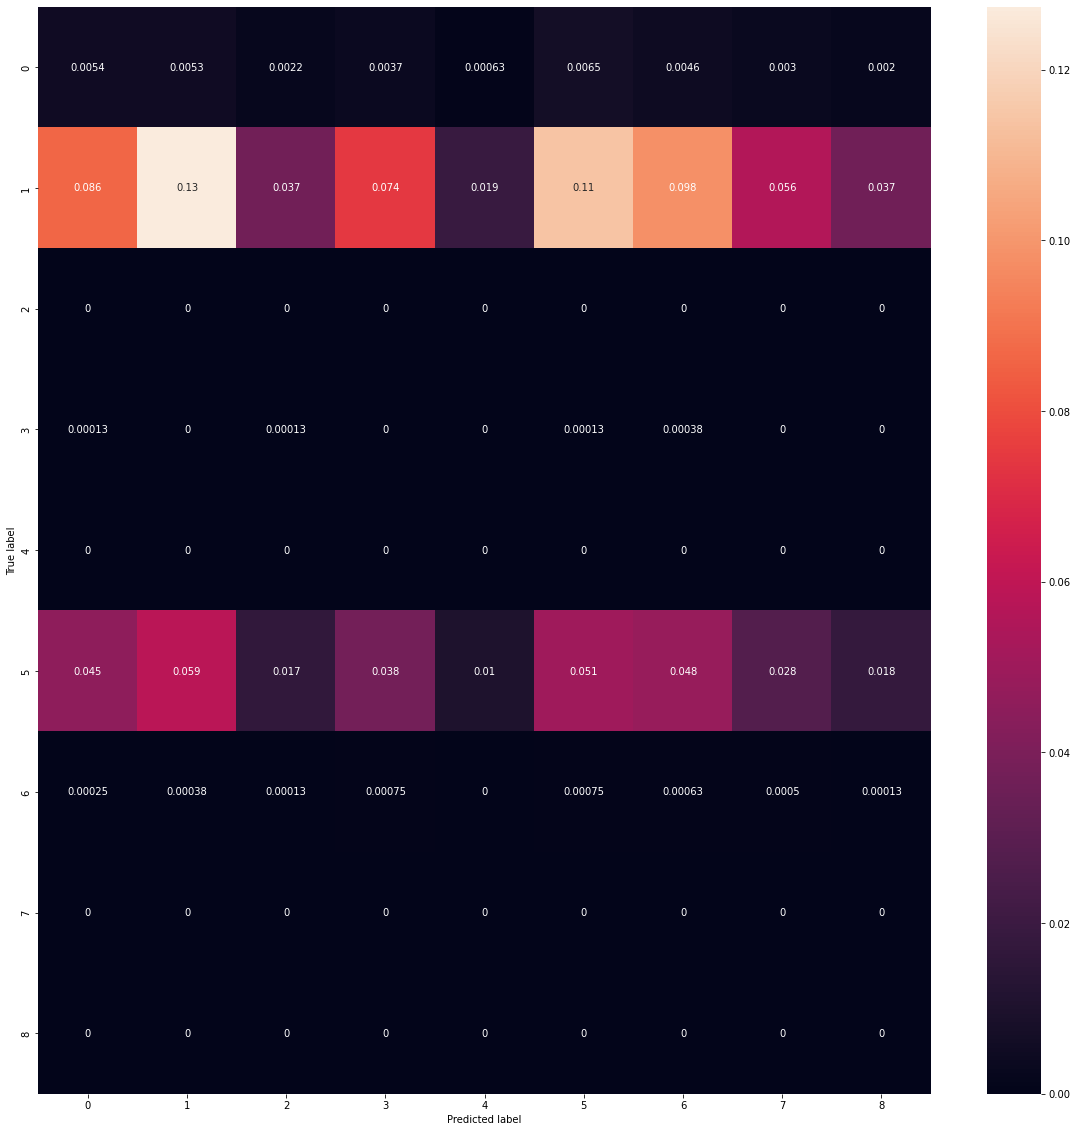

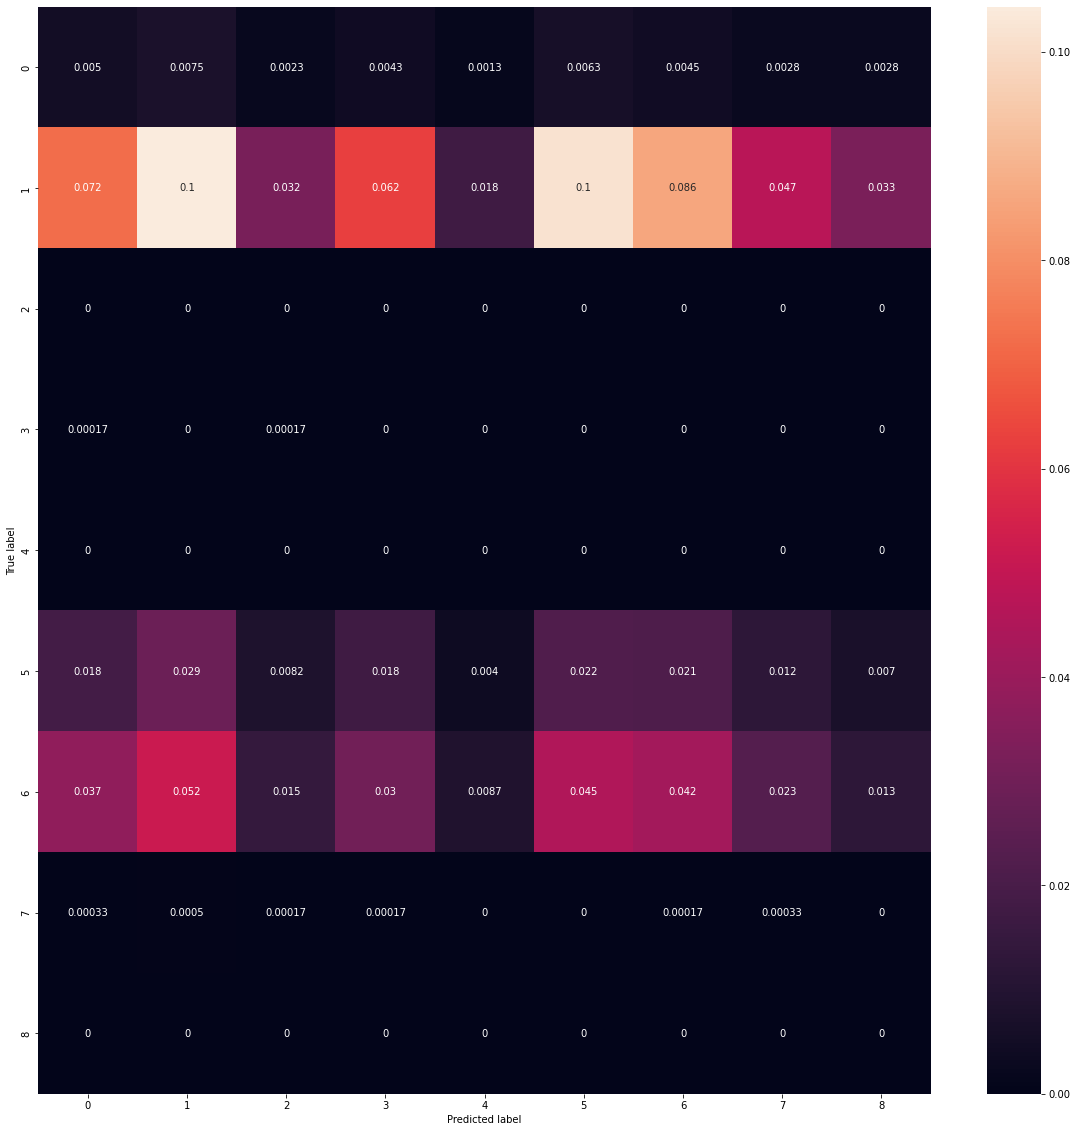

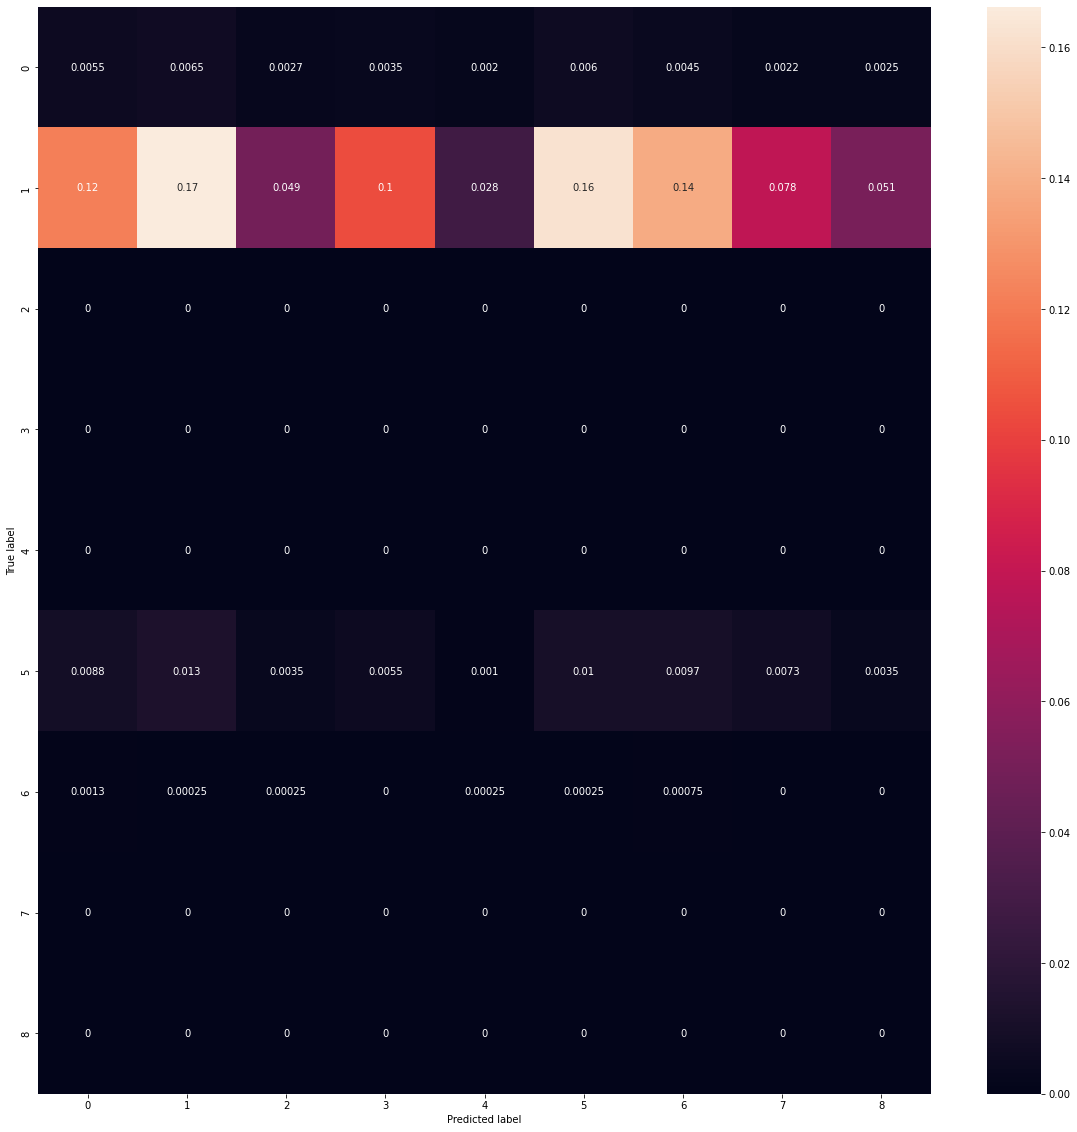

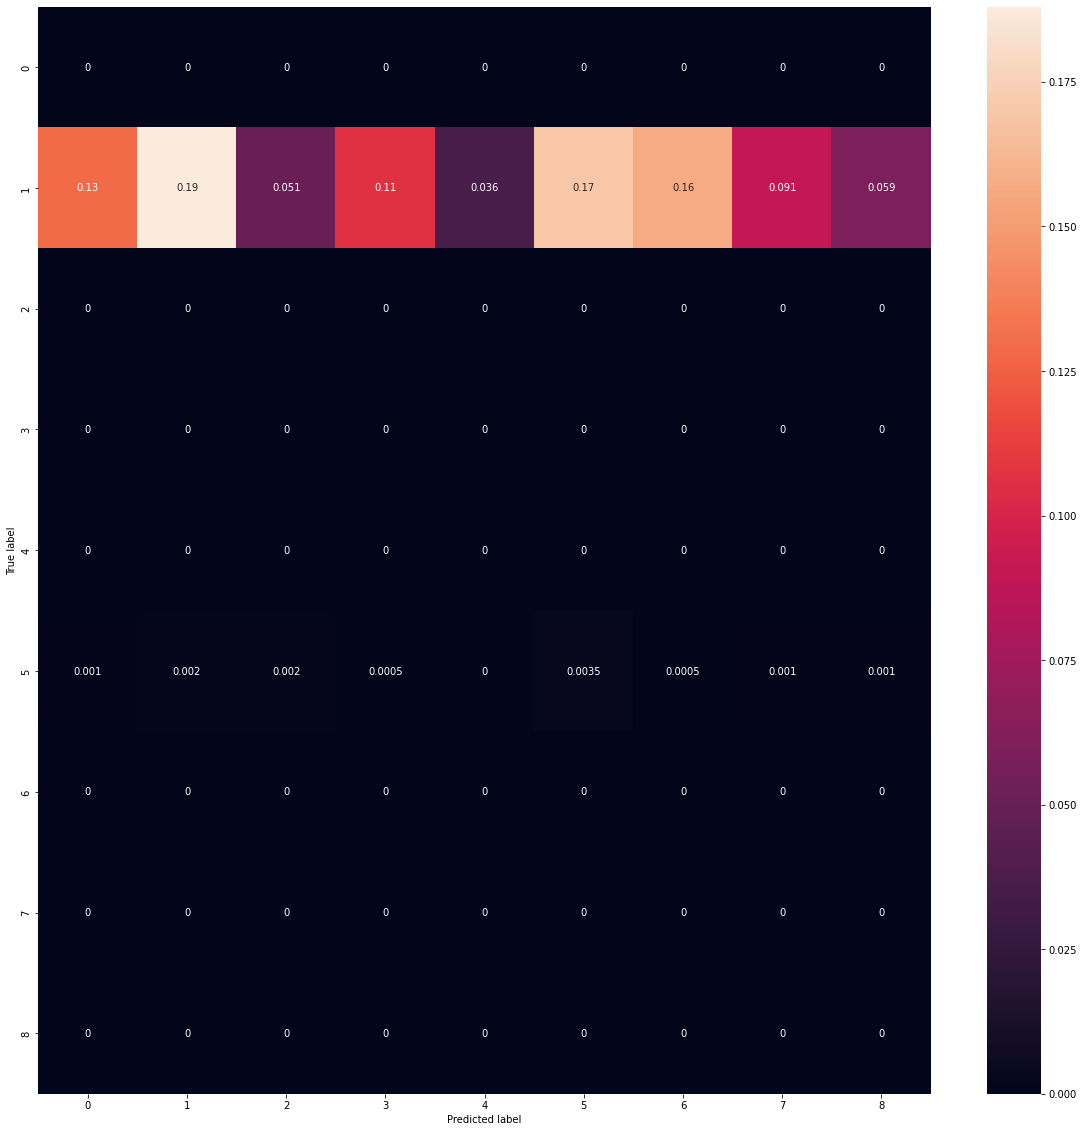

In [76]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
split_ratio=[0.4,0.3,0.2,0.1]
hidden_layer_sizes=[(128,252,252,128),(118,246,246,118),(148,266,266,148),(108,222,222,108)]
# Hidden Layer 1 (128,252,252,128) = 10
# Hidden Layer 2 (118,246,246,118) = 20
# Hidden Layer 3 (148,266,266,148) = 30
# Hidden Layer 4 (108,222,222,108) = 40
Layer_Range=[10,20,30,40]
accuracy=[]
precision=[]
recall=[]
F1=[]

for i in range(0,4):
  X_train, X_test,Y_train,Y_test= train_test_split( X, Y, test_size=split_ratio[i], random_state=2)
  sc_X = StandardScaler()
  X_trainscaled=sc_X.fit_transform(X_train)
  X_testscaled=sc_X.transform(X_test)

  gd = MLPClassifier(activation='relu', solver = 'adam',early_stopping = True, hidden_layer_sizes=hidden_layer_sizes[i], verbose = 1, max_iter = 200).fit(X_trainscaled, Y_train)
  Y_pred=gd.predict(X_testscaled) 
  print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)*100,"%")
  accuracy.append(metrics.accuracy_score(Y_test, Y_pred)*100)

  print ("Precision: ",precision_score(Y_test, Y_pred, average='macro')*100,"%")
  precision.append(precision_score(Y_test, Y_pred, average='macro')*100)

  print ("F1: ",f1_score(Y_test, Y_pred, average='macro')*100,"%")
  F1.append(f1_score(Y_test, Y_pred, average='macro')*100)

  print ("Recall: ",recall_score(Y_test, Y_pred, average=None)*100,"%")
  recall.append(recall_score(Y_test, Y_pred, average=None)*100)




  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confussion Matrics

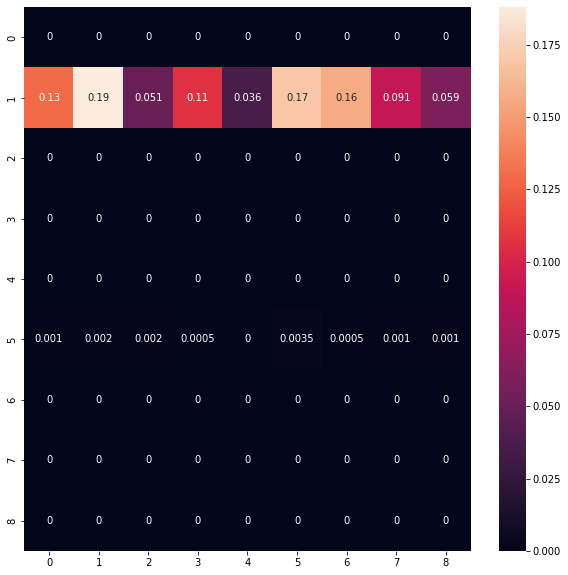

In [80]:
plt.figure(figsize=(10,10))
cf_matrix = confusion_matrix(Y_pred, Y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot= True)

Accuracy


Accuracy: [18.9375, 17.933333333333334, 18.35, 19.25] %



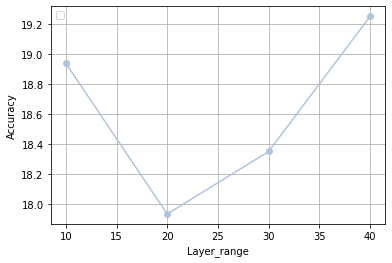

In [ ]:
fig, ax = plt.subplots()
ax.plot(Layer_Range, accuracy, **{'color': 'lightsteelblue', 'marker': 'o'})
plt.legend(loc = "upper left")
plt.xlabel('Layer_range')
plt.ylabel('Accuracy')
print()
print("Accuracy:", accuracy,"%")
print()
plt.grid()
plt.show()

Precision


Precision: [4.604186920949476, 5.837053515764086, 4.029645716842432, 8.420104887496192] %



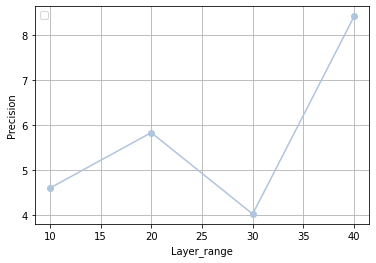

In [ ]:
fig, ax = plt.subplots()
ax.plot(Layer_Range, precision, **{'color': 'lightsteelblue', 'marker': 'o'})
plt.legend(loc = "upper left")
plt.xlabel('Layer_range')
plt.ylabel('Precision')
print()
print("Precision:", precision,"%")
print()
plt.grid()
plt.show()

F1


F1: [3.9484820372361993, 6.079352043728525, 4.396982577086875, 6.472306547135902] %



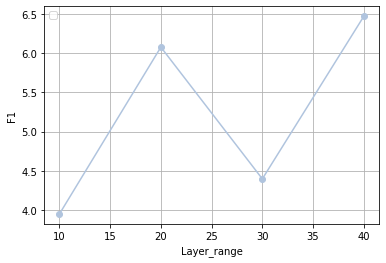

In [ ]:
fig, ax = plt.subplots()
ax.plot(Layer_Range, F1, **{'color': 'lightsteelblue', 'marker': 'o'})
plt.legend(loc = "upper left")
plt.xlabel('Layer_range')
plt.ylabel('F1')
print()
print("F1:", F1,"%")
print()
plt.grid()
plt.show()

Recall


Recall: [array([ 0.        , 97.1950424 ,  0.        ,  0.        ,  0.        ,
        0.14545455,  1.89300412,  0.        ,  0.        ]), array([ 1.36986301, 39.77566868,  0.        ,  0.        ,  0.        ,
       57.52380952,  0.        ,  0.        ,  0.        ]), array([ 0.        , 93.1359354 ,  0.        ,  0.        ,  0.        ,
        5.88235294,  0.        ,  0.        ,  0.        ]), array([ 1.14942529, 56.57894737,  0.        ,  0.        ,  0.        ,
       48.12680115,  0.        ,  0.        ,  0.        ])] %



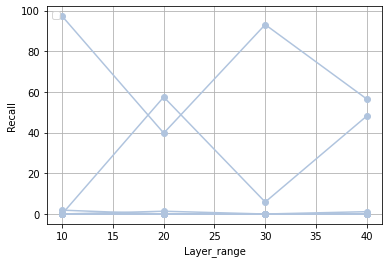

In [ ]:
fig, ax = plt.subplots()
ax.plot(Layer_Range, recall, **{'color': 'lightsteelblue', 'marker': 'o'})
plt.legend(loc = "upper left")
plt.xlabel('Layer_range')
plt.ylabel('Recall')
print()
print("Recall:", recall,"%")
print()
plt.grid()
plt.show()